<a href="https://colab.research.google.com/github/SHEETALDHARSHAN-A/Heart-Disease-prediction/blob/main/HDP_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit pyngrok

from pyngrok import ngrok

# Replace 'YOUR_NGROK_AUTHTOKEN' with your actual Ngrok authtoken
ngrok.set_auth_token('2hXNNapu4Pn8KP8HAmlj3hBXiw0_wGsSwgfgjQC2jXKEzu6m')


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   48    1   0       130   256    1        0      150      1      0.0      2   
1   61    1   0       148   203    0        1      161      0      0.0      2   
2   44    0   2       118   242    0        1      149      0      0.3      1   
3   47    1   0       110   275    0        0      118      1      1.0      1   
4   56    1   3       120   193    0        0      162      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   1     3       0  
2   1     2       1  
3   1     2       0  
4   0     3       1  

Logistic Regression Evaluation Metrics:
Accuracy: 0.7704918032786885
Precision: 0.8142857142857143
Recall: 0.7916666666666666
F1 Score: 0.8028169014084506
Confusion Matrix:
[[37 13]
 [15 57]]
Cross-Validation Accuracy: 0.763961522828885

Random Forest Evaluation Metrics:
Accuracy: 0.9508196721311475
Precision: 0.9459459459459459
Recall: 0.9722222222222222
F1 Score: 0.9589041095

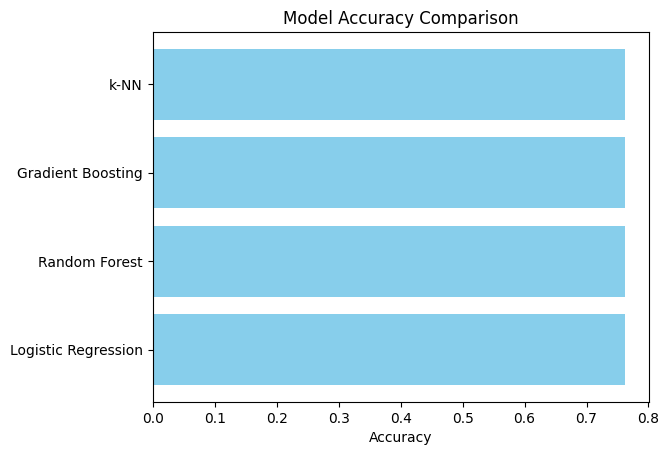

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
# Load the dataset
file_path = 'heart_disease_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Preprocess the data
# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

# Select specified features
selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']
X = data[selected_features]
y = data['target']

# Normalize/scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
best_model = None
best_score = 0
evaluation_results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    evaluation_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': conf_matrix
    }

    # Cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_score_mean = cv_scores.mean()

    print(f"\n{model_name} Evaluation Metrics:")
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Cross-Validation Accuracy: {cv_score_mean}')

    # Update the best model based on cross-validation score
    if cv_score_mean > best_score:
        best_score = cv_score_mean
        best_model = model

print("\nBest model based on cross-validation accuracy:")
print(best_model)

fig, ax = plt.subplots()
model_names = list(models.keys())
ax.barh(model_names, accuracy, color='skyblue') # Use the accuracies list here
ax.set_xlabel('Accuracy')
ax.set_title('Model Accuracy Comparison')

# Save the best model and scaler
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [ ]:

%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load the model and scaler
best_model = None
scaler = None
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Define the features
selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']

# Streamlit app
st.title('Heart Disease Prediction')

# User inputs
st.header('Input Patient Data')
age = st.number_input('Age', min_value=0, max_value=120, value=44)
sex = st.selectbox('Sex', options=[0, 1], format_func=lambda x: 'Female' if x == 0 else 'Male')
cp = st.selectbox('Chest Pain Type (cp)', options=[0, 1, 2, 3], index=2)
trestbps = st.number_input('Resting Blood Pressure (trestbps)', min_value=50, max_value=200, value=118)
chol = st.number_input('Serum Cholesterol (chol)', min_value=100, max_value=400, value=142)
fbs = st.selectbox('Fasting Blood Sugar > 120 mg/dl (fbs)', options=[0, 1], index=0)

# Prediction
if st.button('Predict'):
    input_data = {
        'age': age,
        'sex': sex,
        'cp': cp,
        'trestbps': trestbps,
        'chol': chol,
        'fbs': fbs
    }

    # Convert the input data to DataFrame
    input_df = pd.DataFrame([input_data], columns=selected_features)

    # Scale the input data
    input_scaled = scaler.transform(input_df)

    # Get the probability of heart disease
    probability = best_model.predict_proba(input_scaled)[0][1]

    # Display the result
    st.markdown(f"<h2>The probability of having heart disease is {probability * 100:.2f}%</h2>", unsafe_allow_html=True)

# Display some dataset info and description
st.write('This model is trained on the UCI Heart Disease dataset. The selected features are age, sex, chest pain type (cp), resting blood pressure (trestbps), serum cholesterol (chol), and fasting blood sugar (fbs).')


Writing app.py


In [ ]:
!ngrok authtoken 2hXNNapu4Pn8KP8HAmlj3hBXiw0_wGsSwgfgjQC2jXKEzu6m


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import subprocess
from pyngrok import ngrok

def run_streamlit_app():
    # Open a tunnel on port 8501 for Streamlit, explicitly specifying the 'port'
    tunnel = ngrok.connect(8501, "http")  # Specify port and protocol
    public_url = tunnel.public_url
    print(f'Public URL: {public_url}')

    # Run the Streamlit app
    process = subprocess.Popen(['streamlit', 'run', 'app.py'])
    return process, public_url

# Run the Streamlit app and get the public URL
process, public_url = run_streamlit_app()

# Display the public URL
print(f'Your Streamlit app is available at: {public_url}')

Public URL: https://4c3e-34-171-169-158.ngrok-free.app
Your Streamlit app is available at: https://4c3e-34-171-169-158.ngrok-free.app


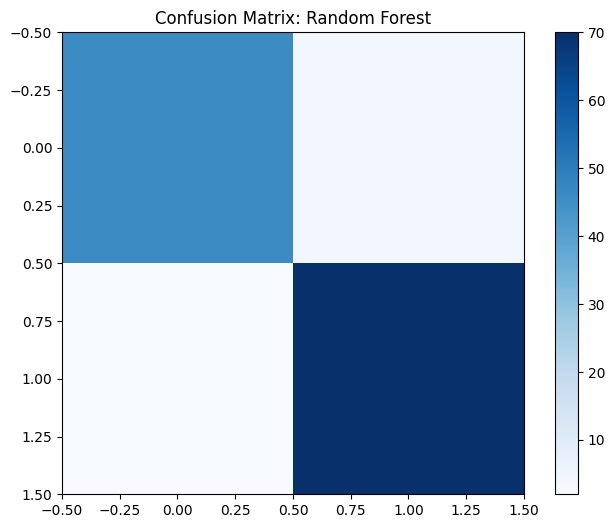

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest (assuming 'best_rf_model' is defined)
cm = confusion_matrix(y_test, best_model.predict(X_test))
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest')
plt.colorbar()
